## About HAPI
The Heliophysics Data Application Programmer’s Interface (HAPI) specification is a time series download and streaming format specification. A 1-page summary is given in HAPI_OnePager.pdf. A more detailed overview is given in the JGR article Weigel et al., 2021 and the presentation by Vandegriff et al. (pdf|YouTube video).

The HAPI specification was recommended by COSPAR in 2018 as the common data access API for space science and space weather data.

When data are available from a HAPI server, there is no need to download data files and write custom file reader programs. Using a HAPI client library, data can be loaded into an array using a single command using HAPI IDL, MATLAB, and Python clients. Data from HAPI servers is also accessible to users of Autoplot, PySPEDAS, and IDL SPEDAS. Sample scripts and containing instructions for accessing data using the above–listed clients may be found by selecting a server, dataset, and time range at the web interface http://hapi-server.org/servers/.

A list of HAPI-compliant data servers is available at http://hapi-server.org/servers/.

The hapi-server GitHub project contains a collection of repositories for HAPI–related software and documentation, including client and server libraries and code for verifying and testing a HAPI server.

Go to the server [here](https://hapi-server.org/)

# VENUS, Mercury, & Earth

In [1]:
from astropy.coordinates import get_body_barycentric
from astropy.time import Time
import pandas as pd

# Generate dates from 2018 to 2025 in 1-day increments
dates = pd.date_range(start="2018-01-01", end="2025-12-31", freq="D")
time = Time(dates)

planets = ['venus', 'mercury', 'earth']

for pp in planets:
    # Get plane position relative to the Sun (barycentric coordinates)
    positions = get_body_barycentric(pp, time)
    
    # Convert to DataFrame
    df = pd.DataFrame({
        "date": dates,
        "x": positions.x.to_value("AU"),
        "y": positions.y.to_value("AU"),
        "z": positions.z.to_value("AU"),
    })
    
    # Print sample data
    print(df.head())
    df.to_csv("./data/"+pp+"_1day_output.csv", index=False)

        date         x         y         z
0 2018-01-01  0.072946 -0.652715 -0.298411
1 2018-01-02  0.092903 -0.650260 -0.298569
2 2018-01-03  0.112790 -0.647300 -0.298496
3 2018-01-04  0.132592 -0.643839 -0.298192
4 2018-01-05  0.152293 -0.639878 -0.297657
        date         x         y         z
0 2018-01-01 -0.385910 -0.015382  0.031272
1 2018-01-02 -0.390240 -0.039322  0.018932
2 2018-01-03 -0.392689 -0.063047  0.006511
3 2018-01-04 -0.393319 -0.086456 -0.005929
4 2018-01-05 -0.392201 -0.109457 -0.018333
        date         x         y         z
0 2018-01-01 -0.173431  0.893407  0.387167
1 2018-01-02 -0.190610  0.890403  0.385864
2 2018-01-03 -0.207729  0.887124  0.384443
3 2018-01-04 -0.224784  0.883573  0.382903
4 2018-01-05 -0.241770  0.879750  0.381245


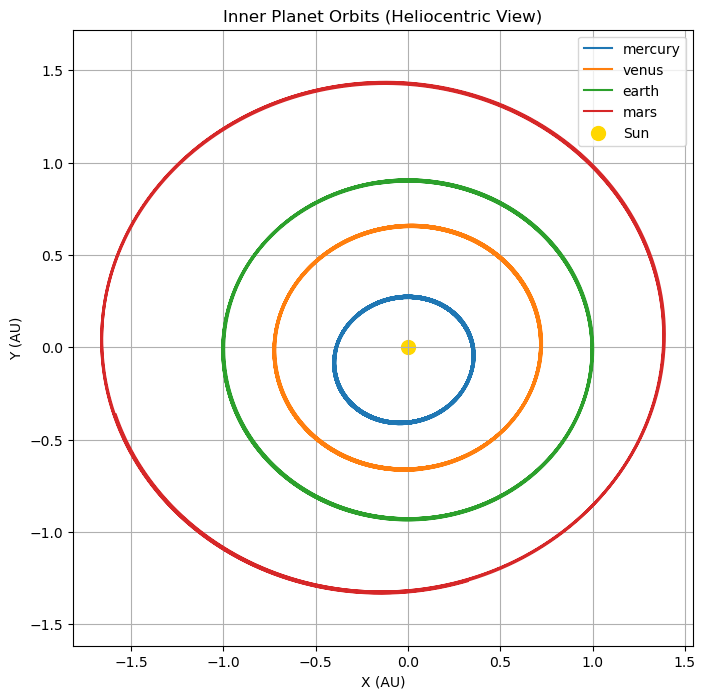

In [2]:
import matplotlib.pyplot as plt
from astropy.coordinates import get_body_barycentric
from astropy.time import Time
import pandas as pd

# Generate dates from 2018 to 2025 in 1-day increments
dates = pd.date_range(start="2018-01-01", end="2025-12-31", freq="D")
time = Time(dates)

# List of inner planets
planets = ['mercury', 'venus', 'earth', 'mars']

# Dictionary to store data
planet_data = {}

plt.figure(figsize=(8, 8))

for pp in planets:
    # Get barycentric positions relative to the Sun
    positions = get_body_barycentric(pp, time)
    
    # Convert to DataFrame
    df = pd.DataFrame({
        "date": dates,
        "x": positions.x.to_value("AU"),
        "y": positions.y.to_value("AU"),
        "z": positions.z.to_value("AU"),
    })
    
    # Store data for potential further analysis
    planet_data[pp] = df
    
    # Plot the 2D top-down view (x, y)
    plt.plot(df["x"], df["y"], label=pp)

# Plot Sun at the center
plt.scatter(0, 0, color='gold', marker='o', s=100, label="Sun")

# Formatting the plot
plt.xlabel("X (AU)")
plt.ylabel("Y (AU)")
plt.title("Inner Planet Orbits (Heliocentric View)")
plt.legend()
plt.axis("equal")
plt.grid(True)

# Show the plot
plt.show()
